In [11]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer.primitives import sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [37]:
#bits to transmit
c = "1"
d = "0"

In [38]:
#superdense protocol ciruit
ebit1 = QuantumRegister(1,"B")
ebit0 = QuantumRegister(1,"A")
a = ClassicalRegister(1,"a")
b = ClassicalRegister(1,"b")
protocol = QuantumCircuit(ebit0,ebit1,a,b)

#enatangling the bits
protocol.h(ebit1)
protocol.cx(ebit1,ebit0)
protocol.barrier()
if d=="1":
    protocol.z(ebit0)
if c=="1":
    protocol.x(ebit0)
protocol.barrier()
protocol.cx(ebit0,ebit1)
protocol.h(ebit0)

protocol.measure(ebit0, a)
protocol.measure(ebit1, b)
display(protocol.draw())

┌───┐ ░ ┌───┐ ░      ┌───┐┌─┐
  A: ─────┤ X ├─░─┤ X ├─░───■──┤ H ├┤M├
     ┌───┐└─┬─┘ ░ └───┘ ░ ┌─┴─┐└┬─┬┘└╥┘
  B: ┤ H ├──■───░───────░─┤ X ├─┤M├──╫─
     └───┘      ░       ░ └───┘ └╥┘  ║ 
a: 1/════════════════════════════╬═══╩═
                                 ║   0 
b: 1/════════════════════════════╩═════
                                 0

{'1 0': 1024}

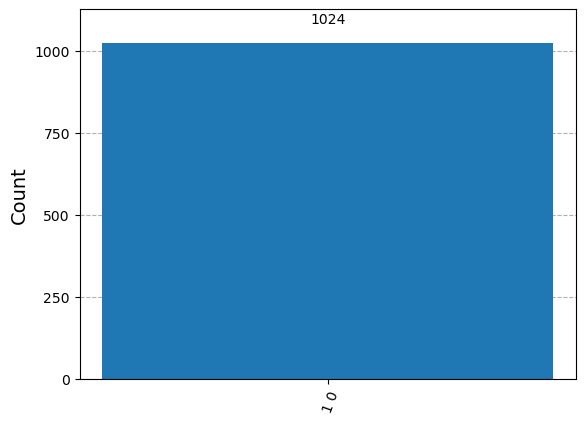

In [39]:
results = AerSimulator().run(protocol).result()
stats = results.get_counts()
display(stats)
display(plot_histogram(stats))

In [69]:
#testing on random c and d
randomizer = QuantumRegister(1,"R")
qd = ClassicalRegister(1,"d")
qc = ClassicalRegister(1,"c")
test = QuantumCircuit(randomizer, qd,qc,ebit0,ebit1,a,b)

#applying random c and d bits
test.h(randomizer)
test.measure(randomizer,qd)
test.h(randomizer)
test.measure(randomizer,qc)

#entangling the bits and A and B
test.h(ebit1)
test.cx(ebit1,ebit0)

#applying gate depending on d and c to A
with test.if_test((qd,1)):
    test.z(ebit0)
with test.if_test((qc,1)):
    test.x(ebit0)

#finally transforming back from entangled to individual 
test.cx(ebit0,ebit1)
test.h(ebit0)
test.measure(ebit0, a)
test.measure(ebit1, b)
display(test.draw())

┌───┐┌─┐┌───┐                       ┌─┐                                 »
  R: ┤ H ├┤M├┤ H ├───────────────────────┤M├─────────────────────────────────»
     └───┘└╥┘├───┤┌────── ┌───┐ ───────┐ └╥┘┌────── ┌───┐ ───────┐      ┌───┐»
  A: ──────╫─┤ X ├┤ If-0  ┤ Z ├  End-0 ├──╫─┤ If-0  ┤ X ├  End-0 ├───■──┤ H ├»
     ┌───┐ ║ └─┬─┘└──╥─── └───┘ ───────┘  ║ └──╥─── └───┘ ───────┘ ┌─┴─┐└┬─┬┘»
  B: ┤ H ├─╫───■─────╫────────────────────╫────╫───────────────────┤ X ├─┤M├─»
     └───┘ ║      ┌──╨──┐                 ║    ║                   └───┘ └╥┘ »
d: 1/══════╩══════╡ 0x1 ╞═════════════════╬════╬══════════════════════════╬══»
           0      └─────┘                 ║ ┌──╨──┐                       ║  »
c: 1/═════════════════════════════════════╩═╡ 0x1 ╞═══════════════════════╬══»
                                          0 └─────┘                       ║  »
a: 1/═════════════════════════════════════════════════════════════════════╬══»
                                                                          ║  »
b: 1/═════════════════════════════════════════════════════════════════════╩══»
                                                                          0  »
«        
«  R: ───
«     ┌─┐
«  A: ┤M├
«     └╥┘
«  B: ─╫─
«      ║ 
«d: 1/═╬═
«      ║ 
«c: 1/═╬═
«      ║ 
«a: 1/═╩═
«      0 
«b: 1/═══
«

{'0 1 0 1': 266, '1 1 1 1': 262, '0 0 0 0': 251, '1 0 1 0': 245}

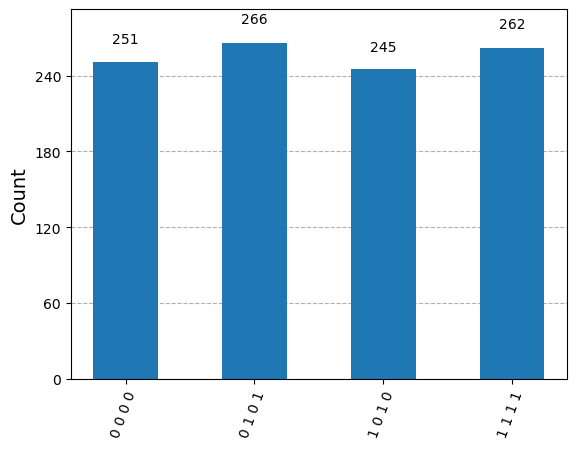

In [88]:
#running the simulator

results = AerSimulator().run(test).result()
stats = results.get_counts()
display(stats)
display(plot_histogram(stats))
# we can see that first two qubit states always matches the other two